In [1]:
from classifiers import *
from helpers import*
from proj1_helpers import *
from preprocessing import *
from validation import *
from plots import *

# REMARK
From the previous analysis we found good hyperparameters:
batch_size = 20000
gamma = 1e-6

Now we look if these values are affected when using dditional features

In [2]:
#import the data and preprocess it 
y, x, ids_train = load_csv_data('../data/train.csv')
y_train, tx_train = preprocess(
            y, x, "NanToMean", standardize_=True
        )

#split the data into train and test:
x_train, y_train, x_test, y_test = split_data(x, y, 0.8, verbose=True, )
y_train = (y_train + 1)/2.
y_test = (y_test + 1)/2.
print('x_train, x_test:', x_train.shape, y_test.shape)
print('y_train, y_test:', y_train.shape, y_test.shape)
print('values of y_train', 'values of y_test', set(y_train), set(y_test))

ration:	 0.8
ratio of samples 1st subset:	 0.34
ratio of samples 2nd subset:	 0.34
x_train, x_test: (200000, 30) (50000,)
y_train, y_test: (200000,) (50000,)
values of y_train values of y_test {0.0, 1.0} {0.0, 1.0}


# First approach
Add non interacting terms of various degree

## Degree 2

Current iteration=0, loss=0.6748691753602601
Current iteration=100, loss=0.34275848085397476
Current iteration=200, loss=0.5382489786615332
Current iteration=300, loss=0.3232643249740386
Current iteration=400, loss=0.5025640987032416
Current iteration=500, loss=0.6213463754892928
Current iteration=600, loss=0.3212305294434982
Current iteration=700, loss=0.33027361148765866
Current iteration=800, loss=0.5028282245246243
Current iteration=900, loss=0.32564010695644674


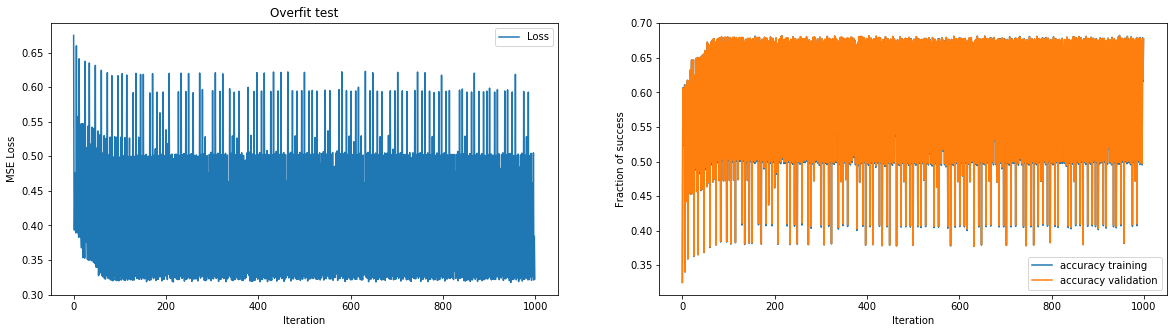

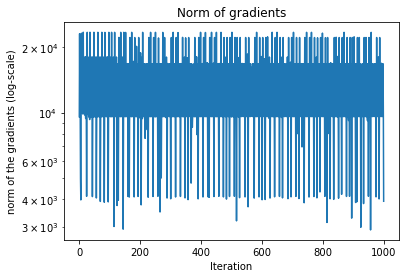

In [8]:
#expand the input
degree = 2
x_train_e = build_poly_standard(x_train, degree)
x_test_e = build_poly_standard(x_test, degree)


#classify 
clf = ClassifierLogisticRegression(
        lambda_=0,
        regularizer=None,
        gamma= 1e-8,
        max_iterations=1000,
        min_max_iterations = 300,
        w_sampling_distr='uniform',
        threshold=1e-8,
    )
clf.train(y_train, x_train_e, 
        batch_size=-1, 
        verbose = True, 
        tx_validation = x_test_e, 
        y_validation = y_test, 
        store_gradient=True, 
        store_losses=True,
        normalize_gradient = True)
        
training_plots(clf, show_gradient=True)

## Initializing with uniform Solves numerical problems

In [ ]:
#expand the input
degree = 2
x_train_e = build_poly_standard(x_train, degree)
x_test_e = build_poly_standard(x_test, degree)
print('Check on expanded shapes', x_train_e.shape, x_test_e.shape)

gammas = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
for gamma in gammas:
        #classify 
        clf = ClassifierLogisticRegression(
                lambda_=0,
                regularizer=None,
                gamma= gamma,
                max_iterations=200,
                min_max_iterations = 300,
                w_sampling_distr='uniform',
                threshold=1e-6,
        )
        clf.train(y_train, x_train_e, 
                batch_size=-1, 
                verbose = True, 
                tx_validation = x_test_e, 
                y_validation = y_test, 
                store_gradient=True, 
                store_losses=True,
                normalize_gradient = True)

        figure = plt.figure()
        training_plots(clf, show_gradient=True)

## Initializing with zero adds a lot of numerical problems

In [9]:
#expand the input
degree = 2
x_train_e = build_poly_standard(x_train, degree)
x_test_e = build_poly_standard(x_test, degree)
print('Check on expanded shapes', x_train_e.shape, x_test_e.shape)

gammas = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
for gamma in gammas:
        #classify 
        clf = ClassifierLogisticRegression(
                lambda_=0,
                regularizer=None,
                gamma= gamma,
                max_iterations=200,
                min_max_iterations = 300,
                w_sampling_distr='zero',
                threshold=1e-6,
        )
        clf.train(y_train, x_train_e, 
                batch_size=-1, 
                verbose = True, 
                tx_validation = x_test_e, 
                y_validation = y_test, 
                store_gradient=True, 
                store_losses=True,
                normalize_gradient = True)

        figure = plt.figure()
        training_plots(clf, show_gradient=True)

Check on expanded shapes (200000, 61) (50000, 61)
Current iteration=0, loss=0.3426349899011171
Current iteration=100, loss=0.5357722746974832
